<a href="https://colab.research.google.com/github/israelaikulola/-Open-In-Colab-https-colab.research.google.com-assets-colab-badge.svg-https-colab.research./blob/main/Copy_of_LS_DS_Unit_4_Sprint_Challenge_3_AG_(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Deep Learning. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

__*GridSearch:*__ CodeGrade will likely break if it is asked to run a gridsearch for a deep learning model (CodeGrade instances run on a single processor). So while you may choose to run a gridsearch locally to find the optimum hyper-parameter values for your model, please delete (or comment out) the gridsearch code and simply instantiate a model with the optimum parameter values to get the performance that you want out of your model prior to submission. 


## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

____

# (CodeGrade) Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) If you have gridsearch code, now is when you either delete it or comment out that code so CodeGrade doesn't run it and crash. 

4) Read the directions in **Part 2** of this notebook for specific instructions on how to prep that section for CodeGrade.

____

<a id="p1"></a>
## Part 1 - LSTMs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric
- Report your overall score and accuracy
- Due to resource concerns on CodeGrade, `set your model's epochs=1`

For reference, the LSTM code we used in class will be useful. 

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done! 

In [ ]:
# Import data (don't alter the code in this cell)
from tensorflow.keras.datasets import reuters

# Suppress some warnings from deprecated reuters.load_data
import warnings
warnings.filterwarnings('ignore')

# Load data
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

# Due to limited computational resources on CodeGrade, take the following subsample 
train_size = 1000
X_train = X_train[:train_size]
y_train = y_train[:train_size]

2121728/2110848 [==============================] - 0s 0us/step


In [ ]:
# Demo of encoding
word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

565248/550378 [==============================] - 0s 0us/step
Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [ ]:
X_train.shape

(1000,)

In [ ]:
# Imports (don't alter this code)
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# DO NOT CHANGE THESE VALUES 
# Keras docs say that the + 1 is needed: https://keras.io/api/layers/core_layers/embedding/
MAX_FEATURES = len(word_index.values()) + 1

# maxlen is the length of each sequence (i.e. document length)
MAXLEN = 200

In [ ]:
# Pre-process your data by creating sequences 
# Save your transformed data to the same variable name:
# example: X_train = some_transformation(X_train)

X_train = sequence.pad_sequences(X_train, maxlen=MAXLEN,padding='post',truncating = 'post')
X_test = sequence.pad_sequences(X_test, maxlen=MAXLEN, padding='post',truncating = 'post')

In [ ]:
X_train.shape

(1000, 200)

In [ ]:
X_test.shape

(2246, 200)

In [ ]:
# Visible tests
assert X_train.shape[1] == MAXLEN, "Your train input sequences are the wrong length. Did you use the sequence import?"
assert X_test.shape[1] == MAXLEN, "Your test input sequences are the wrong length. Did you use the sequence import?"

### Create your model

Make sure to follow these instructions (also listed above):
- Name your model as `model`
- Use a `single hidden layer`
- Use `sparse_categorical_crossentropy` as your loss function
- Use `accuracy` as your metric

**Additional considerations**

The number of nodes in your output layer should be equal to the number of **unique** values in the sequences you are training and testing on. For this text, that value is equal to 46.

- Set the number of nodes in your output layer equal to 46

In [ ]:
# Build and complie your model here

# build a 1 layer LSTM language model 
from tensorflow.keras.optimizers import Adam

# specify learning rate and optimizer
opt = Adam(learning_rate=0.001,)

# as usual, we begin to build our model by instantiating a Sequential class 
model = Sequential()

# input layer 
# we are explicitly declaring the dimension of the input layer here by adding an Embedding object 
model.add(Embedding(MAX_FEATURES, 128))

# hidden layer 1 
model.add(LSTM(128, dropout=0.2, return_sequences=False))

# output layer 
model.add(Dense(46, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt, 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3965440   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 46)                5934      
Total params: 4,102,958
Trainable params: 4,102,958
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Visible Test
assert model.get_config()["layers"][1]["class_name"] == "Embedding", "Layer 1 should be an Embedding layer."

In [ ]:
# Hidden Test

### Fit your model

Now, fit the model that you built and compiled in the previous cells. Remember to set your `epochs=1`! 

In [ ]:
# Fit your model here
# REMEMBER to set epochs=1
%%time
# specify batch size
batch_size = 256

results_one_layer = model.fit(X_train, y_train,
                      batch_size=batch_size, 
                      epochs=1, 
                      validation_data=(X_test,y_test))

4/4 [==============================] - 8s 316ms/step - loss: 3.7772 - accuracy: 0.2460 - val_loss: 3.6655 - val_accuracy: 0.3669
CPU times: user 3.28 s, sys: 326 ms, total: 3.6 s
Wall time: 12.3 s


In [ ]:
# Visible Test 
n_epochs = len(model.history.history["loss"])
assert n_epochs == 1, "Verify that you set epochs to 1."

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

The *pad_sequences* method helps fix the length of each vector to truncate at a specific length for any vector longer than that specified lenght, and for any vector shorter than the specified lenght, 0s are filled in until the vector becomes the specified lenth. This ensures that all vectors are the same length, which is required by some LSTM models, including this one.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

There are 2 motivations for using LSTM over traditional RNNs.
1.) Traditional RNNs lack long-term memory capacity for learning long input sequences.
2.) Traditional RNNs suffer from the Vanishing Gradient Problem.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

All of these examples are sequential data:
1) Words in a document.
2) DNA base pairs
3) Sounds in an audio recording

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2, and you should also resize the images using scikit-image.

### Reading in the images

The code in the following cell will download the images to your notebook (either in your local Jupyter notebook or in Google colab).

In [ ]:
# Prep to import images (don't alter the code in this cell)
import urllib.request

# Text file of image URLs
text_file = "https://raw.githubusercontent.com/LambdaSchool/data-science-canvas-images/main/unit_4/sprint_challenge_files/frog_image_url.txt"
data = urllib.request.urlopen(text_file)

# Create list of image URLs
url_list = [] 
for line in data:
    url_list.append(line.decode('utf-8'))

In [ ]:
# Import images (don't alter the code in this cell)

from skimage.io import imread
from skimage.transform import resize 

# instantiate list to hold images
image_list = []

### UNCOMMENT THE FOLLOWING CODE TO LOAD YOUR IMAGES

#loop through URLs and load each image
for url in url_list:
    image_list.append(imread(url))

## UNCOMMENT THE FOLLOWING CODE TO VIEW AN EXAMPLE IMAGE SIZE
#What is an "image"?
print(type(image_list[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(image_list[0].shape)
print(image_list[1].shape)

<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


### Run ResNet50v2

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. You can print out or view the predictions in any way you see fit. In order to receive credit, you need to have made predictions at some point in the following cells.

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

**Autograded tasks**

* Instantiate your ResNet 50v2 and save to a variable named `resnet_model`

**Other tasks**
* Re-size your images
* Use `resnet_model` to predict if each image contains a frog
* Decode your predictions
* Hint: the lesson on CNNs will have some helpful code

**Stretch goals***
* Check for other things such as fish
* Print out the image with its predicted label
* Wrap everything nicely in well documented functions

## Important note!

To increase the chances that your notebook will run in CodeGrade, when you **submit** your notebook:

* comment out the code where you load the images
* comment out the code where you make the predictions
* comment out any plots or image displays you create

**MAKE SURE YOUR NOTEBOOK RUNS COMPLETELY BEFORE YOU SUBMIT!**

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet_v2 import ResNet50V2 # <-- pre-trained model 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [ ]:
from tensorflow.image import resize
from tensorflow.keras.preprocessing.image import smart_resize
from tensorflow.ragged import constant
# from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.6.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? 

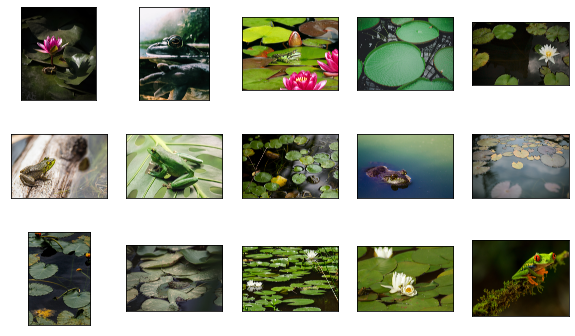

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image_list[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
# images = constant(image_list)

In [ ]:
resnet_model = ResNet50V2(weights='imagenet', include_top=False)

for layer in resnet_model.layers:
    layer.trainable = False

x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet_model.input, predictions)

frogs = ['bullfrog', 'tree_frog', 'tailed_frog']

def image_size(I):
  return tf.keras.preprocessing.image.load_img(I, target_size=(224, 224))
# target_size=[224, 224]

def frog_img(Y):
  x = image.img_to_array(Y)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50V2(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=5)[0]
  print(results)
  for i in results:
      if i[1] in frogs:
          return 'Frog'
      else:
          pass
  return 'No frog'

In [ ]:
resnet_model = ResNet50V2(weights='imagenet')#, include_top=False)

for layer in resnet_model.layers:
    layer.trainable = False

x = resnet_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet_model.input, predictions)

frogs = ['bullfrog', 'tree_frog', 'tailed_frog']

def image_size(I):
  # image.shape.as_list(image_list, 224, 224, 3)
  # to_array = np.array(image_list)
  # image.resize(to_array, [224,224]).numpy()
  # return img_to_array(image.load_img(I, target_size=(224,224)))
  
  return tf.keras.preprocessing.image.load_img(I, target_size=(224,224))


def resized():
  for i in image_list:
    resized = cv2.resize(i, (224, 224))

def frog_img(Y):
  x = image.load_img(Y, target_size=(224, 224))
  x = image.img_to_array(Y)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50V2(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=5)[0]
  print(results)
  for i in results:
      if i[1] in frogs:
          return 'Frog'
      else:
          pass
  return 'No frog'

102883328/102869336 [==============================] - 2s 0us/step


ValueError: ignored

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

def image_contains_frog(img):
  """
  Inputs image into ResNet50V2 pre-trained model and
  returns whether or not the image is likely to contain a frog
  """
  # load and resize the image
  # x = image.load_img(img, target_size=(224, 224))

  # pre-process the image
  x = resize(img, (224, 224))
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  
  # get classification of image
  features = resnet_model.predict(x)
  
  results = decode_predictions(features, top=3)[0]

  for entry in results:
    if entry[1] == 'frog':
      return True
  return False

In [ ]:
for url, img in zip(url_list, image_list):
   print(f'{url}Contains a frog: {image_contains_frog(img)}')

ValueError: ignored

In [ ]:
copy1 = image_list.copy()

In [ ]:
listToStr = ' '.join(map(str, copy1))

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
img = imagefr_size(copy1)
plt.imshow(img)
plt.show()
prediction = frog_img(img)
print(prediction)
print()

TypeError: ignored

In [ ]:
for image in image_list:
    img = frog_img(copy1)
    plt.imshow(img)
    plt.show()
    prediction = frog_img(img)
    print(prediction)
    print()

AttributeError: ignored

In [ ]:
!pip install opencv-python

In [ ]:
import cv2

In [ ]:
x = np.array(image_list)
print(x.shape)

(15,)


In [ ]:
for i in image_list:
  resized = cv2.resize(i, (224, 224))
  print(resized.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [ ]:
print(resized(image_list[0].shape))

In [ ]:
# image_size[1]

In [ ]:
images = tf.keras.utils.img_to_array(image_list)  
images = a_img.reshape((1,) + x.shape) 
aug_imgs.append(a_img)

ValueError: ignored

In [ ]:
size = (1000, 1000)
resized = smart_resize(images, size=size, interpolation='bilinear')

ValueError: ignored

In [ ]:
dir(smart_resize)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_keras_api_names',
 '_keras_api_names_v1']

In [ ]:
resize = resize(
    image_list, (1000,1000), method='gaussian', preserve_aspect_ratio=False,
    antialias=True, name=None
)

ValueError: ignored

In [ ]:
resnet_model = ResNet50V2(
    include_top=False, weights='imagenet', input_tensor=None,
    input_shape=(1200,1000,3), pooling='max',
    classifier_activation='softmax'
)

94683136/94668760 [==============================] - 13s 0us/step


In [ ]:
# Code from the CNN lecture might come in handy here! 

images = resize(image_list[0], (1200,1000))
images.shape

TensorShape([1200, 1000, 3])

In [ ]:
# Visible test
assert resnet_model.get_config()["name"] == "resnet50v2", "Did you instantiate the resnet model?"

<a id="p3"></a>
## Part 3 - Autoencoders

**Describe a use case for an autoencoder given that an autoencoder tries to predict its own input.**

YOUR ANSWER HERE

<a id="p4"></a>
## Part 4 - More...

**Answer the following questions, with a target audience of a fellow Data Scientist:**

- What do you consider your strongest area as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?

A few sentences per answer is fine - only elaborate if time allows.

YOUR ANSWER HERE

## Congratulations! 

Thank you for your hard work, and [congratulations](https://giphy.com/embed/26xivLqkv86uJzqWk)!!! You've learned a lot, and you should proudly call yourself a Data Scientist.
